## ENTORNO

In [1]:
!pip install dash
from dash import dcc
import dash_html_components as html

external_stylesheets = ['estilos.css']



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.5 MB/s 
     |████████████████████████████████| 357 kB 50.2 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
!pip install jupyter-dash

#DATOS DE TIEMPO
import matplotlib.dates as mdates
from datetime import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

#DATOS GEOGRÁFICOS
!pip install geopandas
!pip install contextily
!pip install shapely
!pip install matplotlib
#import geopandas as gpd
import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0092aff9266db83ba918b3fc309b04f7b0b324665df480ec78989665e29254e2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 662 kB/s 
     |████████████████████████████████| 6.3 MB 26.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 363 kB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

##PROCESAR DATOS

In [6]:
df = pd.read_csv('/content/Border_Crossing_Entry_Data.csv')

In [ ]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [ ]:
df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)
346732,Presidio,Texas,2403,US-Mexico Border,01/01/1996 12:00:00 AM,Trucks,347,POINT (-104.39000000000001 29.56)


In [ ]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   State      346733 non-null  object
 2   Port Code  346733 non-null  int64 
 3   Border     346733 non-null  object
 4   Date       346733 non-null  object
 5   Measure    346733 non-null  object
 6   Value      346733 non-null  int64 
 7   Location   346733 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [ ]:
#borrar datos de hora, todos son 00:00
df1['Date'] = df1['Date'].str.replace('12:00:00 AM',"")

In [ ]:
#cambiar datos de fecha a datetime 
df1['Date'] = df1['Date'].apply(pd.to_datetime)

#VISUALIZACIONES

##VIS 1

In [ ]:
df1 ['Year']= pd.to_datetime(df1['Date']).dt.year
df1

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019
...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996


In [ ]:
year = df1[['Border', 'Measure', 'Value', 'Year']]
year

,Border,Measure,Value,Year
0,US-Mexico Border,Trucks,34447,2019
1,US-Canada Border,Rail Containers Full,428,2019
2,US-Mexico Border,Trucks,81217,2019
3,US-Mexico Border,Trains,62,2019
4,US-Canada Border,Personal Vehicle Passengers,16377,2019
...,...,...,...,...
346728,US-Canada Border,Personal Vehicle Passengers,9119,1996
346729,US-Mexico Border,Personal Vehicles,29486,1996
346730,US-Canada Border,Rail Containers Full,0,1996
346731,US-Mexico Border,Buses,0,1996


In [ ]:
by_year = year.groupby(['Year', 'Border']).sum().reset_index()
by_year


,Year,Border,Value
0,1996,US-Canada Border,153038903
1,1996,US-Mexico Border,276751448
2,1997,US-Canada Border,145512710
3,1997,US-Mexico Border,348661488
4,1998,US-Canada Border,142294090
5,1998,US-Mexico Border,366296614
6,1999,US-Canada Border,146497328
7,1999,US-Mexico Border,391959396
8,2000,US-Canada Border,147789673
9,2000,US-Mexico Border,392231869


In [ ]:
by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    48 non-null     int64 
 1   Border  48 non-null     object
 2   Value   48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
"DE LÍNEAS PARA EXPLICAR DATOS ANUALES UNA LÍNEA POR BORDER DE 1996"
import plotly.express as px

fig = px.line(by_year, x='Year', y= 'Value', color='Border', hover_name= 'Value')
fig.show()

##VIS 2

In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
year.Measure.unique()

array(['Trucks', 'Rail Containers Full', 'Trains',
       'Personal Vehicle Passengers', 'Bus Passengers',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full',
       'Pedestrians', 'Train Passengers'], dtype=object)

In [ ]:
by_measure = year.groupby(['Year', 'Border', 'Measure']).sum().reset_index()
by_measure

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000
...,...,...,...,...
571,2019,US-Mexico Border,Train Passengers,2521
572,2019,US-Mexico Border,Trains,2916
573,2019,US-Mexico Border,Truck Containers Empty,453762
574,2019,US-Mexico Border,Truck Containers Full,1185656


In [ ]:
by_measure = by_measure.replace({'Measure':{'Truck Containers Full':'Trucks', 'Truck Containers Empty':'Trucks', 'Rail Containers Full': 'Rail Containers', 'Rail Containers Empty':'Rail Containers'}}).groupby(['Year', 'Measure']).sum().reset_index()
by_measure.Measure.unique()


array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers', 'Train Passengers', 'Trains', 'Trucks'],
      dtype=object)

In [ ]:
fig2 = px.bar(by_measure, x="Year", y="Value", color="Measure", title="Distribución de entradas por años")
fig2.show()

In [ ]:
from jupyter_dash import JupyterDash # Versión de dash para notebooks
from dash import dcc # Componentes HTML preconstruidos para dashboards
from dash import html # Componentes HTML nativos
from dash.dependencies import Input, Output # Clases Input y Output
import plotly.express as px # Generar gráficas e importar datasets con Plotly

import pandas as pd # Recolección y manipulación de datos

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# external_stylesheets = ['style/mihoja.css']

#app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='year-slider',
        min=by_measure['Year'].min(),
        max=by_measure['Year'].max(),
        value=by_measure['Year'].min(), #POR DEFAULT EMPIEZA EN EL AÑO MINIMO
        marks={str(Year): str(Year) for Year in by_measure['Year'].unique()}, #ETIQUETAS DE CADA AÑO UNICO 
        step=None
    )

], style={'background-color': '#242a44'})

In [ ]:
@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    filtered_df = by_measure[by_measure.Year == selected_year] #SELECTED YEAR DEPENDE DE DONDE ESTÉ EN EL SLIDER

    fig = px.bar(filtered_df, x="Measure", y="Value", color="Value", title="Measure used by year")

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, mode='inline')

<IPython.core.display.Javascript object>

# MAPA


In [ ]:
by_points = df.copy()

In [ ]:
by_points = by_points[['Port Name', 'Border', 'Location']]
by_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   Border     346733 non-null  object
 2   Location   346733 non-null  object
dtypes: object(3)
memory usage: 7.9+ MB


In [ ]:
#Separacion de la locacion en latitud y longitud

In [ ]:
by_points['Location'] = by_points['Location'].str.lstrip('POINT')
by_points['Location']

0           (-115.48433000000001 32.67524)
1                     (-67.94271 47.16207)
2                    (-117.05333 32.57333)
3          (-110.93361 31.340279999999996)
4           (-73.44253 44.990010000000005)
                        ...               
346728                      (-71.79 45.01)
346729                     (-107.63 31.78)
346730                         (-99.35 49)
346731                     (-115.39 32.67)
346732         (-104.39000000000001 29.56)
Name: Location, Length: 346733, dtype: object

In [ ]:
by_points['Location']= by_points['Location'].str.replace(r'\)', '')
by_points['Location']= by_points['Location'].str.replace(r'\(', '')
by_points['Location']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



0           -115.48433000000001 32.67524
1                     -67.94271 47.16207
2                    -117.05333 32.57333
3          -110.93361 31.340279999999996
4           -73.44253 44.990010000000005
                       ...              
346728                      -71.79 45.01
346729                     -107.63 31.78
346730                         -99.35 49
346731                     -115.39 32.67
346732         -104.39000000000001 29.56
Name: Location, Length: 346733, dtype: object

In [ ]:
by_points['Location'].shape

(346733,)

In [ ]:
temp = by_points['Location']
temp.to_frame()
temp[0]

' -115.48433000000001 32.67524'

In [ ]:
temp = pd.DataFrame(by_points['Location'].str.split(' ',2).tolist(),columns = ['z','Y','X'])
temp

,z,Y,X
0,,-115.48433000000001,32.67524
1,,-67.94271,47.16207
2,,-117.05333,32.57333
3,,-110.93361,31.340279999999996
4,,-73.44253,44.990010000000005
...,...,...,...
346728,,-71.79,45.01
346729,,-107.63,31.78
346730,,-99.35,49
346731,,-115.39,32.67


In [ ]:
by_points.insert(3, "Longitude", temp.X, True) 
by_points.insert(4,"Latitude",temp.Y,True)

In [ ]:
by_points.head()

,Port Name,Border,Location,Longitude,Latitude
0,Calexico East,US-Mexico Border,-115.48433000000001 32.67524,32.67524,-115.48433000000001
1,Van Buren,US-Canada Border,-67.94271 47.16207,47.16207,-67.94271
2,Otay Mesa,US-Mexico Border,-117.05333 32.57333,32.57333,-117.05333
3,Nogales,US-Mexico Border,-110.93361 31.340279999999996,31.340279999999996,-110.93361
4,Trout River,US-Canada Border,-73.44253 44.990010000000005,44.990010000000005,-73.44253


In [ ]:
#Se pasana los datos a float
long = by_points['Longitude'].astype('float')
lat = by_points['Latitude'].astype('float')

In [ ]:
crs = {'init': 'epsg:4326'} #Sistema de referencia de coordenadas
geometry = [Point(xy) for xy in zip( lat, long)]
ports = gpd.GeoDataFrame(by_points, crs = crs, geometry = geometry)
ports.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,Port Name,Border,Location,Longitude,Latitude,geometry
0,Calexico East,US-Mexico Border,-115.48433000000001 32.67524,32.67524,-115.48433000000001,POINT (-115.48433 32.67524)
1,Van Buren,US-Canada Border,-67.94271 47.16207,47.16207,-67.94271,POINT (-67.94271 47.16207)
2,Otay Mesa,US-Mexico Border,-117.05333 32.57333,32.57333,-117.05333,POINT (-117.05333 32.57333)
3,Nogales,US-Mexico Border,-110.93361 31.340279999999996,31.340279999999996,-110.93361,POINT (-110.93361 31.34028)
4,Trout River,US-Canada Border,-73.44253 44.990010000000005,44.990010000000005,-73.44253,POINT (-73.44253 44.99001)


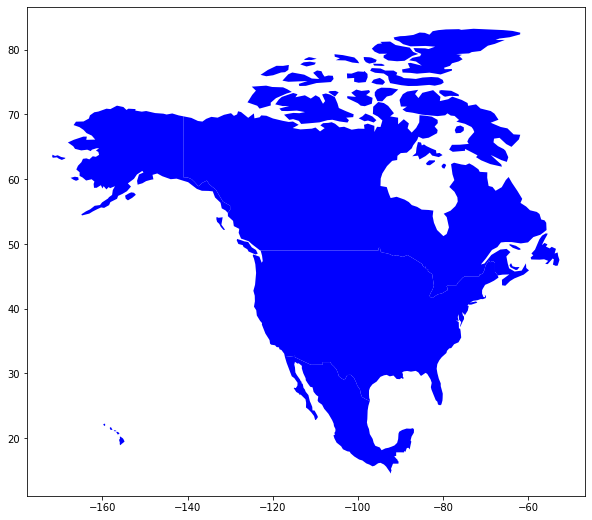

In [ ]:
#Obtener mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

border_data = world.loc[world['name'].isin(['United States of America', 'Canada', 'Mexico'])]
fig,ax = plt.subplots(figsize = (10,10))
border_data.plot(ax = ax, color='blue')

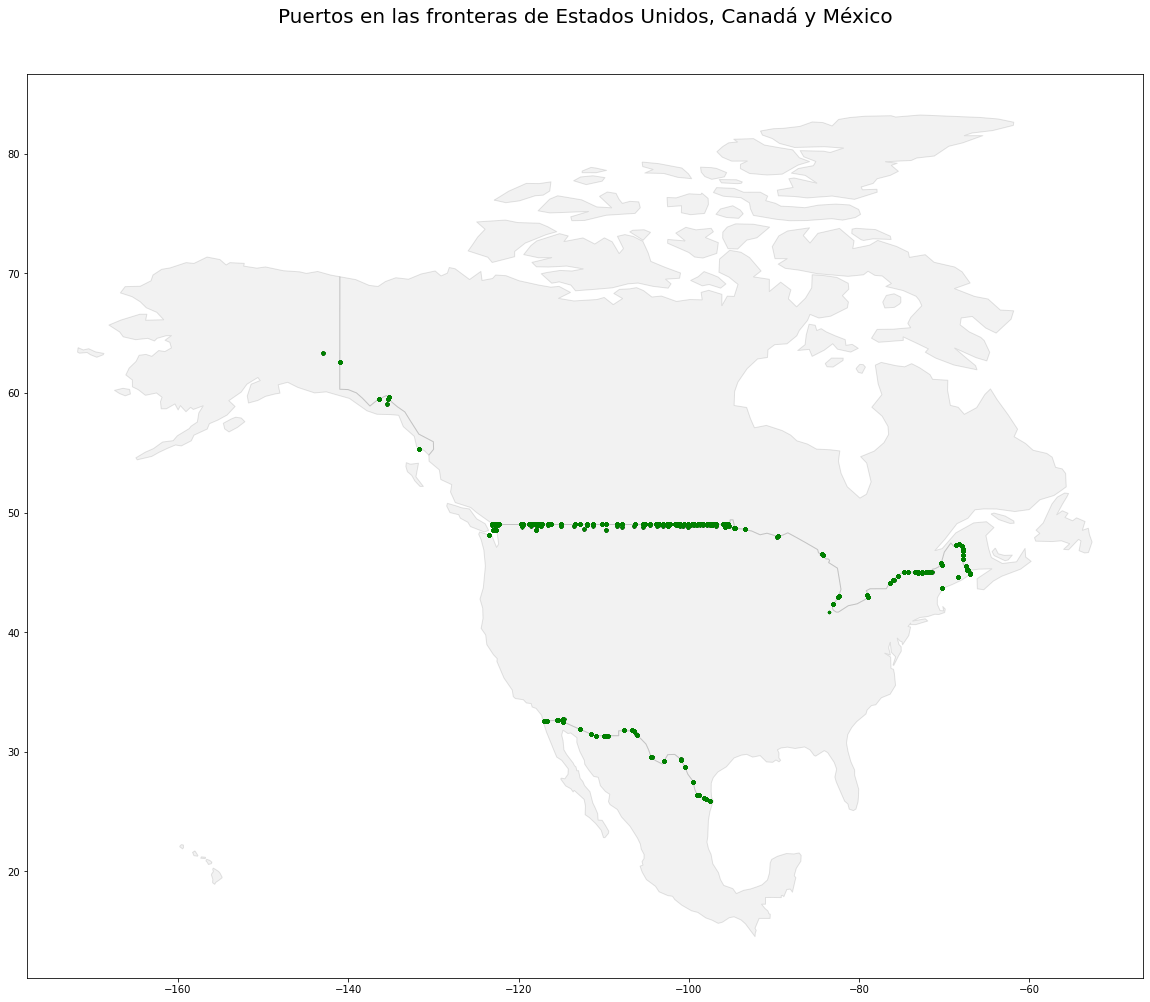

In [ ]:
#Mapa con los puntos en donde se localizan los puertos
fig,ax = plt.subplots(figsize = (20,50))
title = plt.title('Puertos en las fronteras de Estados Unidos, Canadá y México', fontsize=20)
title.set_position([0.5, 1.05])
border_data.plot(ax = ax, color='grey', edgecolor='black',linewidth=1, alpha=0.1)
ports.plot(marker='o', color='green', markersize=5, ax=ax)

In [5]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
!pip install earthpy
import earthpy as et

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


# Comparaciones atemporales

In [15]:
df1=df.copy()
print(df1.info)

<bound method DataFrame.info of             Port Name         State  Port Code            Border  \
0       Calexico East    California       2507  US-Mexico Border   
1           Van Buren         Maine        108  US-Canada Border   
2           Otay Mesa    California       2506  US-Mexico Border   
3             Nogales       Arizona       2604  US-Mexico Border   
4         Trout River      New York        715  US-Canada Border   
...               ...           ...        ...               ...   
346728         Norton       Vermont        211  US-Canada Border   
346729       Columbus    New Mexico       2406  US-Mexico Border   
346730       Hansboro  North Dakota       3415  US-Canada Border   
346731  Calexico East    California       2507  US-Mexico Border   
346732       Presidio         Texas       2403  US-Mexico Border   

                          Date                      Measure  Value  \
0       03/01/2019 12:00:00 AM                       Trucks  34447   
1       03/

In [16]:
df['Measure']

0                              Trucks
1                Rail Containers Full
2                              Trucks
3                              Trains
4         Personal Vehicle Passengers
                     ...             
346728    Personal Vehicle Passengers
346729              Personal Vehicles
346730           Rail Containers Full
346731                          Buses
346732                         Trucks
Name: Measure, Length: 346733, dtype: object

In [17]:
plt.style.use('seaborn-dark')
#plt.style.use('default')

In [18]:
df1.drop(["Port Code"],axis=1,inplace=True)
df1.columns=["port_name","state","border","date","measure","value","location"]

In [19]:
df1.border.value_counts()

US-Canada Border    266187
US-Mexico Border     80546
Name: border, dtype: int64

In [21]:
plt.style.use("default")

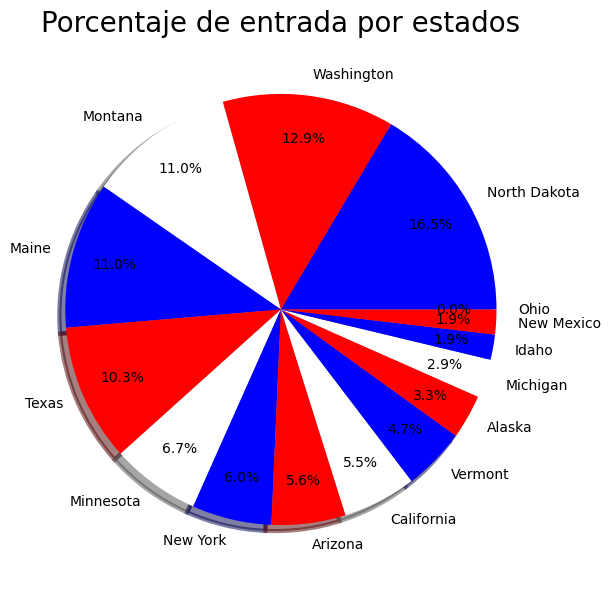

In [22]:

labels=df1['state'].value_counts().index
colors=['blue','red', 'white']
explode=[0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
values=df1['state'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%', pctdistance=0.8, shadow=True,
        wedgeprops = {'linewidth': 3})
plt.title('Porcentaje de entrada por estados',color='black',fontsize=20)
plt.show()

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df1.port_name)
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(18,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#desbloquear la linea de abajo si no se reconoce PIL
from PIL import Image  
mascara = np.array(Image.open("/content/png-transparent-united-states-map-drawing-us-carnivoran-black-silhouette.png"))


In [28]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
        

In [29]:
# La transformamos
transformed = np.ndarray((mascara.shape[0],mascara.shape[1]), np.int32)

for i in range(len(mascara)):
    transformed[i] = list(map(transform_format, mascara[i]))

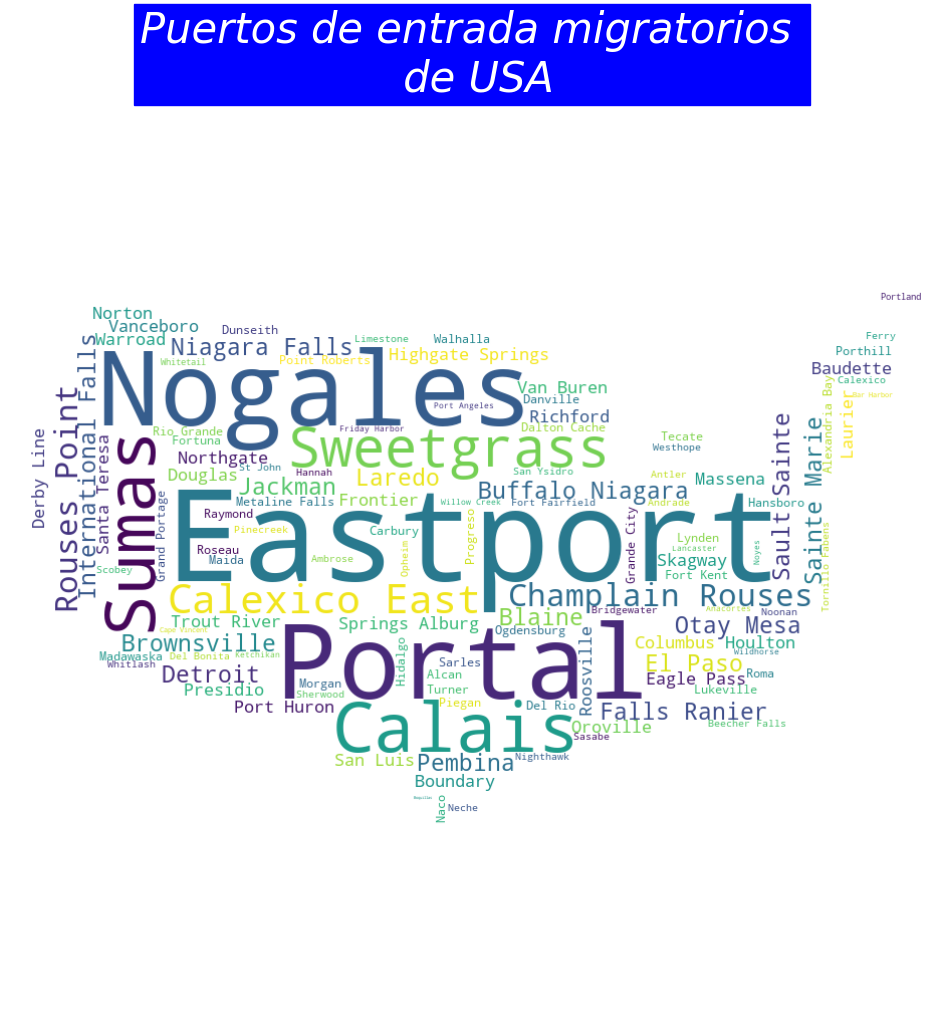

In [34]:
text = " ".join(str(each) for each in df1.port_name)
wc = WordCloud(background_color="white", max_words=1000, mask=transformed,
               contour_width=3, contour_color='white')

#Generar las palabras
wc.generate(text)



# show
plt.figure(figsize=[14,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Puertos de entrada migratorios \n de USA', size=30, fontstyle='italic', backgroundcolor='blue', color='white')
plt.show()

### Profile

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [37]:
import pandas as pd
import pandas_profiling as pp
df=pd.read_csv('/content/Border_Crossing_Entry_Data.csv')
profile = pp.ProfileReport(df)


In [38]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]